# Ex02 Bar chart

In [1]:
import pandas as pd
import sqlite3

In [2]:
con = sqlite3.connect("../data/checking-logs.sqlite")
cur = con.cursor()

In [ ]:
commit_data =  pd.read_sql("""
                SELECT timestamp as commit_time FROM checker
                WHERE uid LIKE 'user%' or uid is null
            """, 
            con, parse_dates='commit_time')
commit_data

,commit_time
0,2020-04-17 05:18:51.965864
1,2020-04-17 05:19:02.744528
2,2020-04-17 05:22:35.249331
3,2020-04-17 05:22:45.549397
4,2020-04-17 05:34:14.691200
...,...
3387,2020-05-21 20:19:06.872761
3388,2020-05-21 20:22:41.785725
3389,2020-05-21 20:22:41.877806
3390,2020-05-21 20:37:00.129678


In [4]:
commit_data['commit_date'] = commit_data.commit_time.dt.date
commit_data['commit_hour'] = commit_data.commit_time.dt.hour
commit_data

,commit_time,commit_date,commit_hour
0,2020-04-17 05:18:51.965864,2020-04-17,5
1,2020-04-17 05:19:02.744528,2020-04-17,5
2,2020-04-17 05:22:35.249331,2020-04-17,5
3,2020-04-17 05:22:45.549397,2020-04-17,5
4,2020-04-17 05:34:14.691200,2020-04-17,5
...,...,...,...
3387,2020-05-21 20:19:06.872761,2020-05-21,20
3388,2020-05-21 20:22:41.785725,2020-05-21,20
3389,2020-05-21 20:22:41.877806,2020-05-21,20
3390,2020-05-21 20:37:00.129678,2020-05-21,20


In [5]:
cut_bins = [0, 4, 10, 17, 24]
labels_bins = ['night', 'morning', 'afternoon', 'evening']
commit_data['daytime'] = pd.cut(commit_data.commit_hour, bins = cut_bins,  labels = labels_bins, right = False)

In [6]:
commit_data

,commit_time,commit_date,commit_hour,daytime
0,2020-04-17 05:18:51.965864,2020-04-17,5,morning
1,2020-04-17 05:19:02.744528,2020-04-17,5,morning
2,2020-04-17 05:22:35.249331,2020-04-17,5,morning
3,2020-04-17 05:22:45.549397,2020-04-17,5,morning
4,2020-04-17 05:34:14.691200,2020-04-17,5,morning
...,...,...,...,...
3387,2020-05-21 20:19:06.872761,2020-05-21,20,evening
3388,2020-05-21 20:22:41.785725,2020-05-21,20,evening
3389,2020-05-21 20:22:41.877806,2020-05-21,20,evening
3390,2020-05-21 20:37:00.129678,2020-05-21,20,evening


In [7]:
daytime_data = commit_data[['commit_date','daytime']].groupby(['commit_date','daytime'], as_index=False).daytime.value_counts()
daytime_data


/tmp/ipykernel_11113/774916269.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  daytime_data = commit_data[['commit_date','daytime']].groupby(['commit_date','daytime'], as_index=False).daytime.value_counts()


,commit_date,daytime,count
0,2020-04-17,night,0
1,2020-04-17,morning,14
2,2020-04-17,afternoon,12
3,2020-04-17,evening,0
4,2020-04-18,night,0
...,...,...,...
135,2020-05-20,evening,12
136,2020-05-21,night,0
137,2020-05-21,morning,2
138,2020-05-21,afternoon,30


In [8]:
pivot = pd.pivot(data=daytime_data,index='commit_date',columns='daytime',values='count')
pivot

daytime,night,morning,afternoon,evening
commit_date,,,,
2020-04-17,0,14,12,0
2020-04-18,0,2,38,38
2020-04-19,2,4,18,12
2020-04-20,0,0,16,16
2020-04-21,0,0,0,26
2020-04-22,0,0,6,26
2020-04-23,4,6,16,22
2020-04-24,0,0,4,12
2020-04-25,2,26,34,52


In [9]:
pivot.count()

daytime
night        35
morning      35
afternoon    35
evening      35
dtype: int64

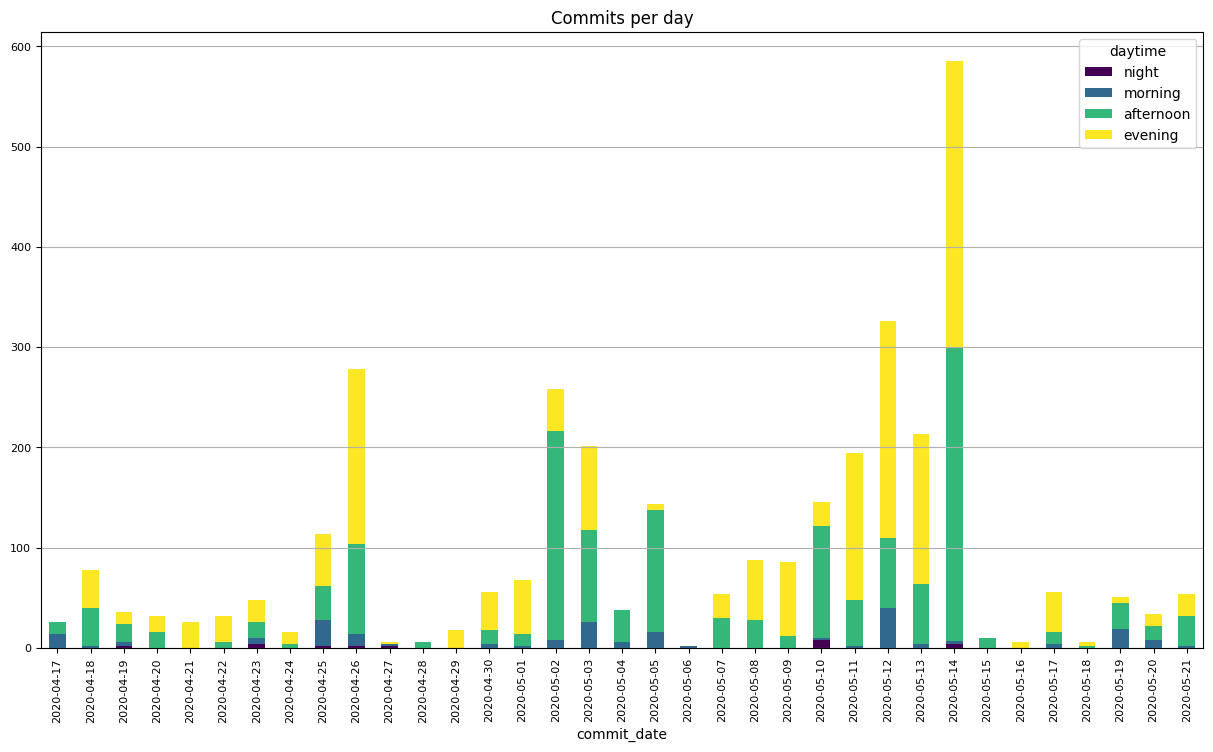

In [10]:
pivot.plot(kind='bar', 
           stacked = True, 
           title = 'Commits per day', 
           fontsize=8,figsize=(15,8), 
           colormap='viridis'
           ).grid(True, axis = 'y')


* Когда наши пользователи обычно выполняют лабораторные работы: ночью, утром, днем ​​или вечером?

Ответ: днем и вечером

* В какой день наибольшее количество коммитов

Ответ: 2020-05-14

* В какой день наибольшее количество коммитов и количество коммитов вечером больше чем днем

Ответ: 2020-05-12

In [11]:
con.close()